<a href="https://colab.research.google.com/github/akfalah/03_AhmadKhoirulFalah/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# @title Langkah 1

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# @title Langkah 2

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

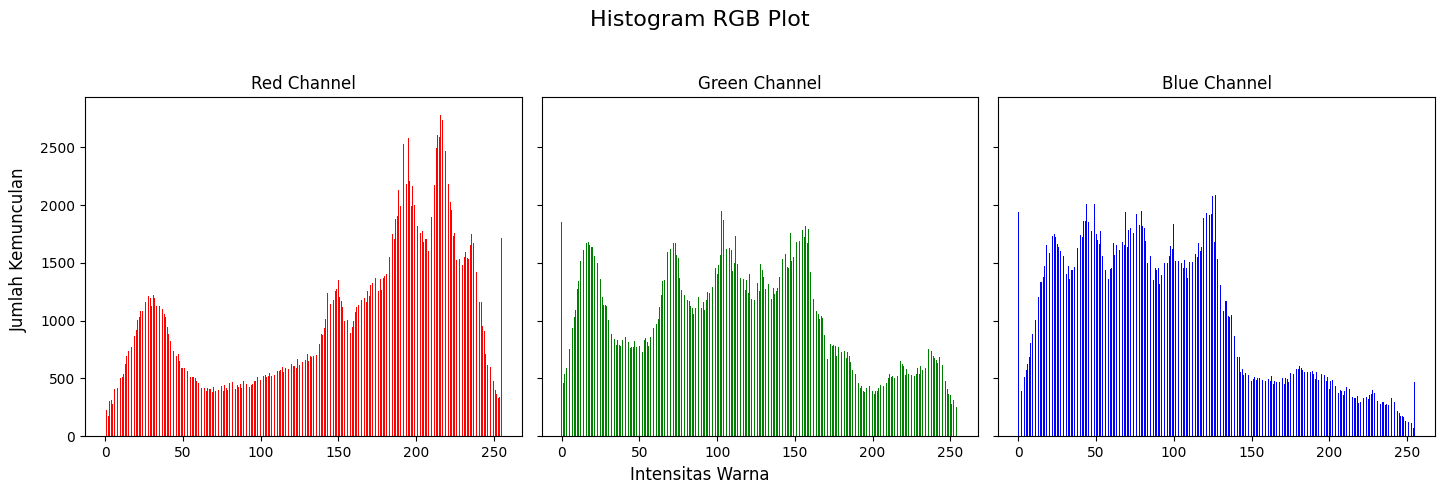

In [58]:
# @title Langkah 3

# Start
# Input image: Membaca gambar lena.jpg
image = cv.imread('/content/drive/MyDrive/pcvk/Images/lena.jpg')

# Mengonversi gambar dari BGR ke RGB (karena OpenCV membaca dalam BGR)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada
# Pisahkan gambar menjadi 3 channel: R, G, B
colors = ('red', 'green', 'blue')
titles = ['Red Channel', 'Green Channel', 'Blue Channel']

# Membuat 3 subplot untuk masing-masing channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, color in enumerate(colors):
  # Menghitung histogram untuk channel RGB
  histogram = cv.calcHist([image_rgb], [i], None, [256], [0, 256])

  # Plot histogram
  axes[i].bar(range(256), histogram[:, 0], color=color, width=0.5)
  axes[i].set_title(titles[i])

# Menambahkan satu judul untuk seluruh plot
fig.suptitle('Histogram RGB Plot', fontsize=16)

# Menambahkan label pada sumbu X dan Y yang mewakili ketiga plot
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=12)

# Menampilkan histogram
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()
# End

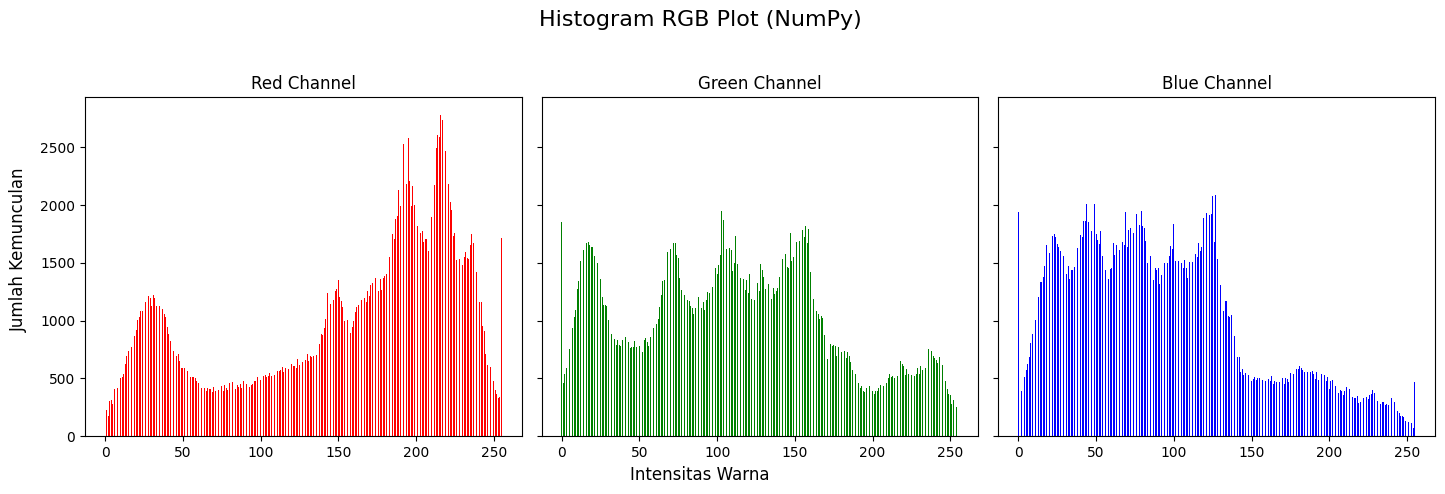

In [59]:
# @title Langkah 4

# Start
# Input image: Membaca gambar lena.jpg
image = cv.imread('/content/drive/MyDrive/pcvk/Images/lena.jpg')

# Mengonversi gambar dari BGR ke RGB (karena OpenCV membaca dalam BGR)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Membuat 3 subplot untuk masing-masing channel
colors = ('red', 'green', 'blue')
titles = ['Red Channel', 'Green Channel', 'Blue Channel']

# Membuat 3 subplot untuk masing-masing channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, color in enumerate(colors):
  # Pisahkan channel RGB
  channel = image_rgb[:, :, i].ravel()

  # Menggunakan numpy.histogram untuk menghitung histogram
  histogram, bin_edges = np.histogram(channel, bins=256, range=(0, 256))

  # Plot histogram menggunakan nilai dari numpy.histogram
  axes[i].bar(bin_edges[:-1], histogram, color=color, width=0.5)
  axes[i].set_title(titles[i])

# Menambahkan satu judul untuk seluruh plot
fig.suptitle('Histogram RGB Plot (NumPy)', fontsize=16)

# Menambahkan label pada sumbu X dan Y yang mewakili ketiga plot
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=12)

# Menampilkan histogram
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()
# End

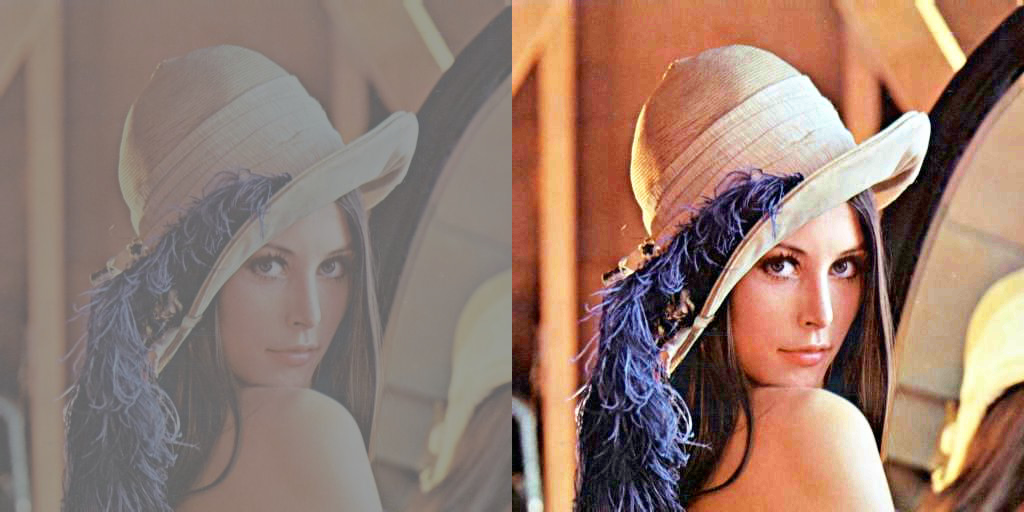

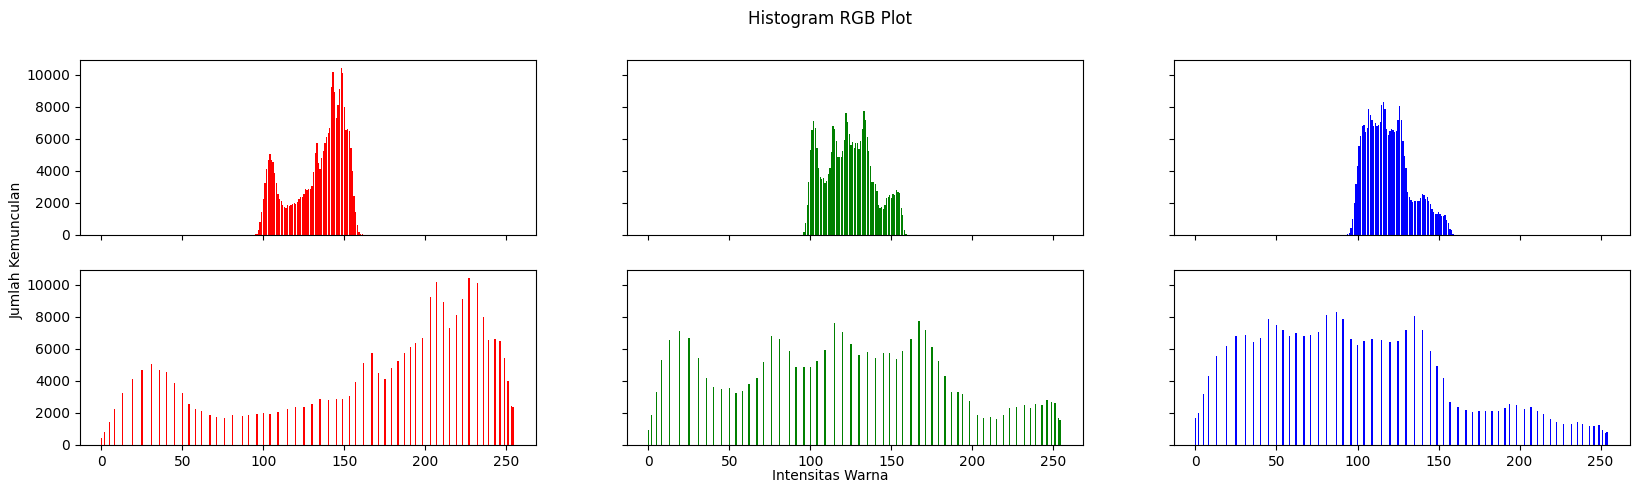

In [60]:
# @title Langkah 5

img = cv.imread('/content/drive/MyDrive/pcvk/Images/lena_lc.jpg')

def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3, 256))

  for y in range(0, height):
    for x in range(0, width):
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1

  return ax

histo_asli = histog(img)

img_array = np.asarray(img)

histogram_array = np.bincount(img_array.flatten(), minlength=256)
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2))
cv2_imshow(final_frame)

blue, green, red = img[:, :, 0], img[:, :, 1], img[:, :, 2]
isgrayimg = np.array_equal(blue, green) and np.array_equal(green, red)

names = np.arange(256)
if not isgrayimg:
  fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB Plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

  axs[0, 0].bar(names, histo_asli[2], color='red')
  axs[0, 1].bar(names, histo_asli[1], color='green')
  axs[0, 2].bar(names, histo_asli[0], color='blue')

  axs[1, 0].bar(names, equal_histo[2], color='red')
  axs[1, 1].bar(names, equal_histo[1], color='green')
  axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
  fig.suptitle('Histogram Grayscale Plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

  axs[0].bar(names, histo_asli[0], color='gray')
  axs[1].bar(names, equal_histo[0], color='gray')

plt.show()

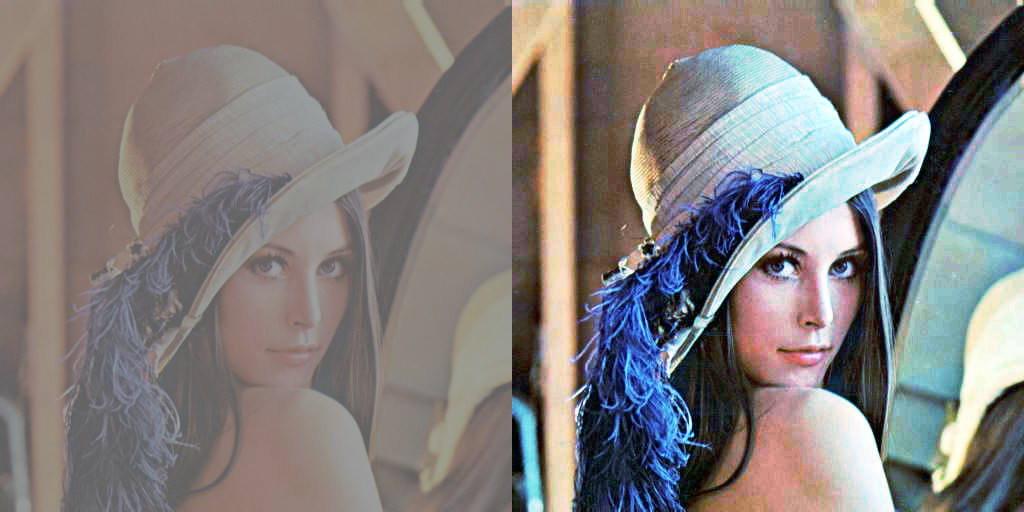

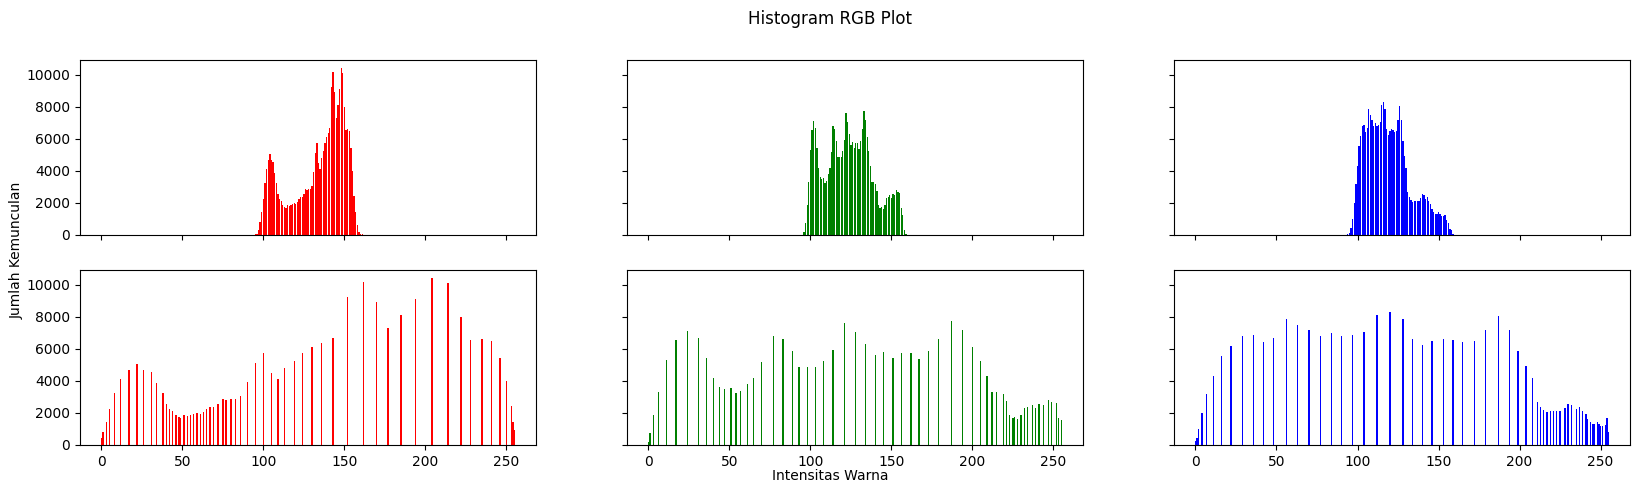

In [61]:
# @title Langkah 6

img1 = cv.imread('/content/drive/MyDrive/pcvk/Images/lena_lc.jpg')

channels = cv.split(img1)

eq_channels = []
for ch in channels:
  eq_channels.append(cv.equalizeHist(ch))

eq_image = cv.merge(eq_channels)

def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3, 256))

  for y in range(0, height):
    for x in range(0, width):
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(img1)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

blue, green, red = img1[:, :, 0], img1[:, :, 1], img1[:, :, 2]
isgraying = np.array_equal(blue, green) and np.array_equal(green, red)

names = np.arange(256)
if not isgraying:
  fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB Plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

  axs[0, 0].bar(names, histo_asli[2], color='red')
  axs[0, 1].bar(names, histo_asli[1], color='green')
  axs[0, 2].bar(names, histo_asli[0], color='blue')

  axs[1, 0].bar(names, equal_histo[2], color='red')
  axs[1, 1].bar(names, equal_histo[1], color='green')
  axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
  fig.suptitle('Histogram Grayscale Plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

  axs[0].bar(names, histo_asli[0], color='gray')
  axs[1].bar(names, equal_histo[0], color='gray')

plt.show()

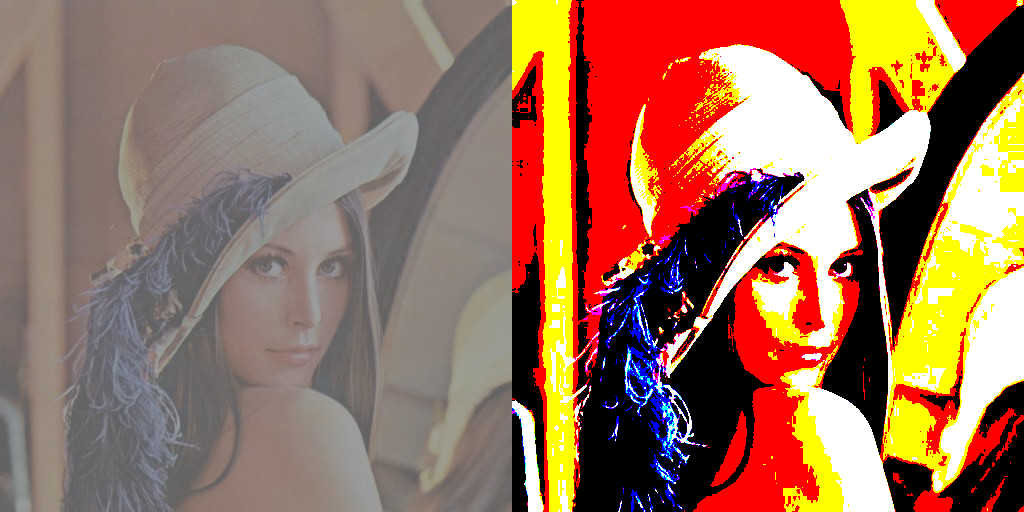

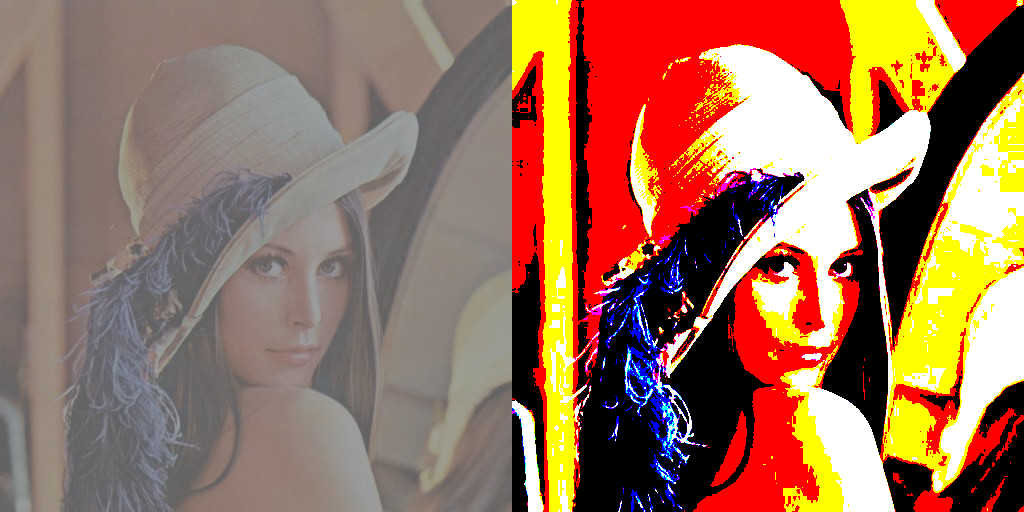

False

In [62]:
# @title Langkah 7

image_1 = cv.imread('/content/drive/MyDrive/pcvk/Images/lena_lc.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff

    if (distance < minDistance):
      minDistance = distance
      pValue = i

  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(image_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))

cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/pcvk/Images/testlena.jpg', img_8)

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i

  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(image_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))

cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/pcvk/Images/testlena.jpg', img_8)

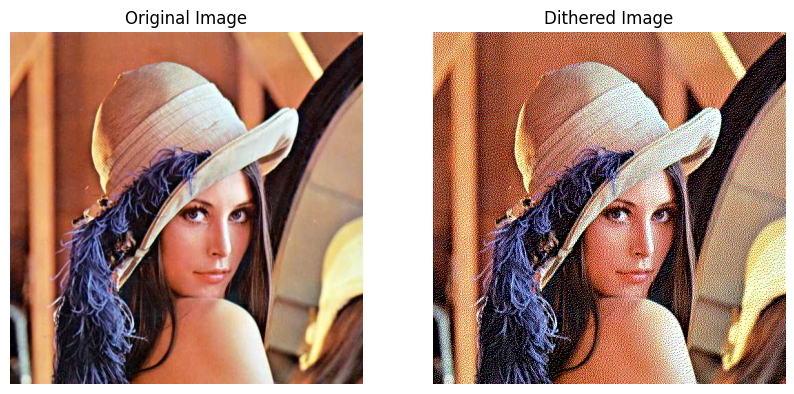

In [63]:
# @title Langkah 8

image = cv.imread('/content/drive/MyDrive/pcvk/Images/lena.jpg')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

def threshold(value):
  """Ensure the pixel value is within the range of 0 to 255."""
  if value > 255:
    return 255
  elif value < 0:
    return 0
  else:
    return value

def floyd_steinberg_dithering(image):
  """Apply Floyd-Steinberg dithering to the input RGB image."""
  height, width, channels = image.shape
  dithered_image = np.zeros((height, width, channels), dtype=np.uint8)

  for y in range(height):
    for x in range(width):
      for c in range(channels):
        pixel_old = image[y, x, c]
        pixel_new = threshold(round(pixel_old / 255.0) * 255)
        dithered_image[y, x, c] = pixel_new

        error = pixel_old - pixel_new

        if x + 1 < width:
          image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7 / 16)
        if y + 1 < height:
            if x > 0:
              image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3 / 16)
            image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5 / 16)
            if x + 1 < width:
              image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1 / 16)

  return dithered_image

dithered_image = floyd_steinberg_dithering(image)


plt.subplot(1, 2, 2)
plt.title('Dithered Image')
plt.imshow(cv.cvtColor(dithered_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


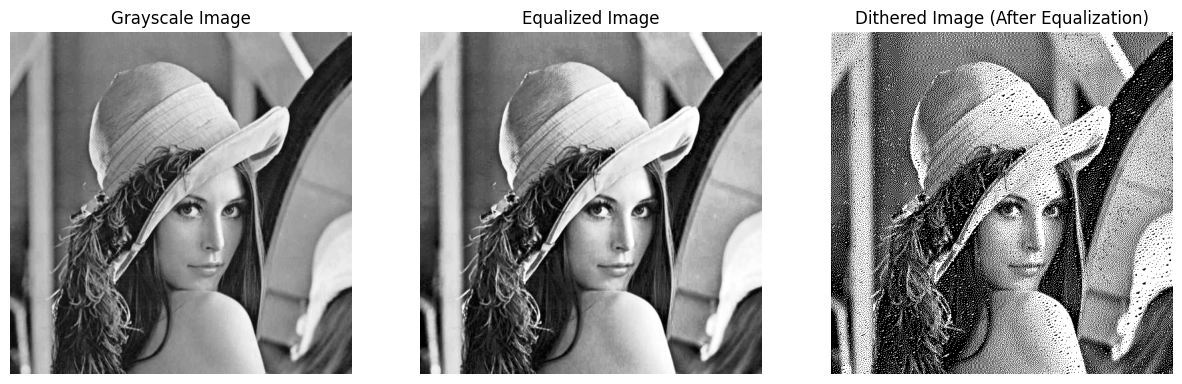

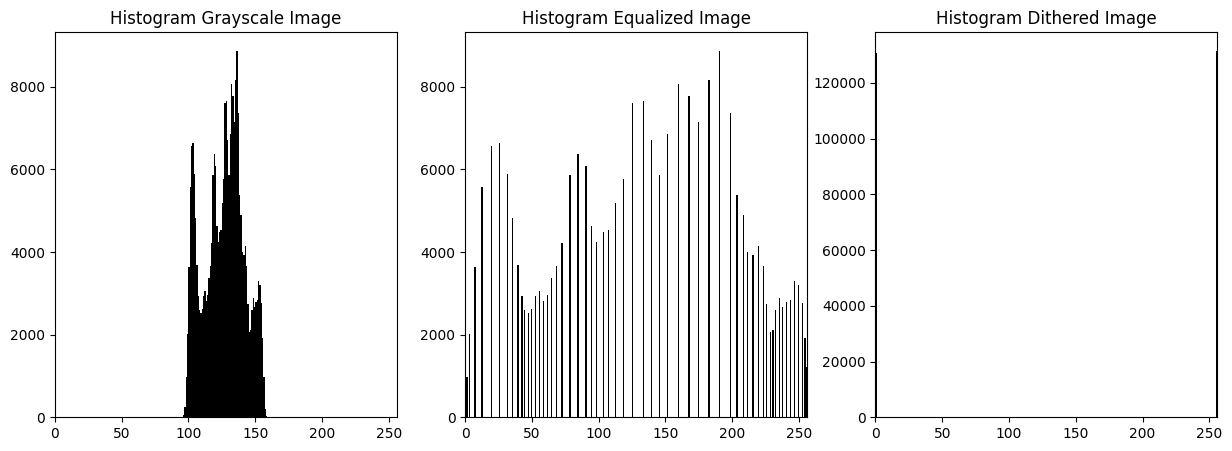

In [71]:
# @title Langkah 9

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_eq_path = '/content/drive/MyDrive/pcvk/Images/lena_lc.jpg'
original_image = cv.imread(img_eq_path)
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)

gray_image = cv.cvtColor(original_image, cv.COLOR_RGB2GRAY)
equalized_image = cv.equalizeHist(gray_image)

def floyd_steinberg_dithering(image):
  height, width = image.shape
  dithered = np.zeros((height, width), dtype=np.uint8)

  for y in range(height):
    for x in range(width):
      old_pixel = image[y, x]
      new_pixel = 255 * (old_pixel > 127)
      dithered[y, x] = new_pixel

      quant_error = old_pixel - new_pixel
      if x < width - 1:
        image[y, x + 1] += quant_error * 7 / 16
      if y < height - 1:
        image[y + 1, x] += quant_error * 5 / 16
      if x > 0 and y < height - 1:
        image[y + 1, x - 1] += quant_error * 3 / 16
      if x < width - 1 and y < height - 1:
        image[y + 1, x + 1] += quant_error * 1 / 16

  return dithered

dithered_image = floyd_steinberg_dithering(equalized_image.copy())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title('Dithered Image (After Equalization)')
plt.axis('off')

plt.show()

# Membuat histogram
plt.figure(figsize=(15, 5))

# Histogram Grayscale
plt.subplot(1, 3, 1)
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram Grayscale Image')
plt.xlim([0, 256])

# Histogram Equalized
plt.subplot(1, 3, 2)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram Equalized Image')
plt.xlim([0, 256])

# Histogram Dithered
plt.subplot(1, 3, 3)
plt.hist(dithered_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram Dithered Image')
plt.xlim([0, 256])

plt.show()
